In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Set seaborn style
sns.set()

# Color palette
COLOR_PALETTE = {
    'primary': '#2563eb',  # Modern blue
    'success': '#10b981',  # Green
    'danger': '#ef4444',   # Red
    'warning': '#f59e0b',  # Orange
    'info': '#3b82f6',     # Light blue
    'secondary': '#6b7280', # Gray
    'background': '#f8fafc', # Light gray
    'text': '#1f2937'      # Dark gray
}

# Load the data
try:
    df = pd.read_csv('data/loan_data.csv')
    print(f"Loaded {len(df)} records")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")

Loaded 45000 records


person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [10]:
# Load the data
# Define the outlier detection function first
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

try:
    df = pd.read_csv('data/loan_data.csv')
    
    # Apply outlier detection
    numeric_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                    'credit_score']

    for col in numeric_cols:
        outliers = detect_outliers(df, col)
        print(f"\nOutliers in {col}: {len(outliers)}")
    
    print(f"Loaded {len(df)} records")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")


Outliers in person_age: 2188

Outliers in person_income: 2218

Outliers in person_emp_exp: 1724

Outliers in loan_amnt: 2348

Outliers in loan_int_rate: 124

Outliers in loan_percent_income: 744

Outliers in cb_person_cred_hist_length: 1366

Outliers in credit_score: 467
Loaded 45000 records


person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [11]:
# Missing value handling
def handle_missing_values(df):
    print("\nMissing Values Analysis:")
    print("Missing values before handling:")
    print(df.isnull().sum())
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    print("\nMissing values after handling:")
    print(df.isnull().sum())
    
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates}")
    if duplicates > 0:
        df = df.drop_duplicates()
        print(f"Removed {duplicates} duplicate rows")
    
    return df

df = handle_missing_values(df)


Missing Values Analysis:
Missing values before handling:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Missing values after handling:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length       

In [12]:
# Basic data exploration
print("\nData Overview:")
print(f"""
Shape: {df.shape}

Columns:
{df.columns.tolist()}

Missing Values:
{df.isnull().sum()}
""")


Data Overview:

Shape: (45000, 14)

Columns:
['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

Missing Values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64



In [13]:
# Basic statistics
print("\nBasic Statistics:")
display(df.describe())
# Feature engineering
df['income_to_loan_ratio'] = df['loan_amnt'] / df['person_income']
df['income_per_age'] = df['person_income'] / df['person_age']
df['credit_history_score'] = df['credit_score'] * df['cb_person_cred_hist_length']

# Convert categorical to numerical
df['person_gender_num'] = df['person_gender'].map({'male': 0, 'female': 1})
df['loan_intent_num'] = pd.factorize(df['loan_intent'])[0]
df['person_home_ownership_num'] = pd.factorize(df['person_home_ownership'])[0]


Basic Statistics:


person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

Found 7 invalid age values
Replaced invalid ages with median age: 26.0
Shapiro-Wilk test for person_income: p-value = 0.0000
Correlation between loan_amnt and loan_int_rate: 0.1461, p-value = 0.0000


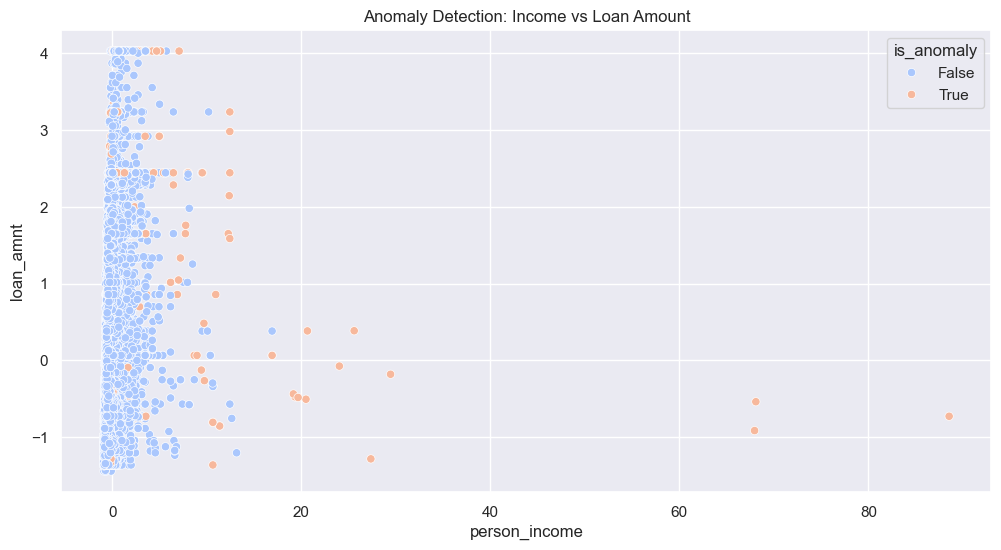

In [14]:
# Data validation

def validate_data(df):
    # Handle invalid age values
    invalid_ages = ~df['person_age'].between(18, 100)
    if invalid_ages.any():
        print(f"Found {invalid_ages.sum()} invalid age values")
        median_age = df['person_age'][df['person_age'].between(18, 100)].median()
        df.loc[invalid_ages, 'person_age'] = median_age
        print(f"Replaced invalid ages with median age: {median_age}")
    
    # Handle negative income values
    negative_income = df['person_income'] < 0
    if negative_income.any():
        print(f"Found {negative_income.sum()} negative income values")
        median_income = df['person_income'][df['person_income'] >= 0].median()
        df.loc[negative_income, 'person_income'] = median_income
        print(f"Replaced negative incomes with median income: {median_income}")
  

validate_data(df)

# Statistical tests
def test_normality(df, column):
    try:
        # For large datasets, use a sample of 5000 points
        sample_size = min(5000, len(df))
        sample = df[column].dropna().sample(n=sample_size, random_state=42)
        
        stat, p = stats.shapiro(sample)
        print(f"Shapiro-Wilk test for {column}: p-value = {p:.4f}")
        return p > 0.05
    except Exception as e:
        print(f"Error in normality test for {column}: {str(e)}")
        return False

def test_correlation_significance(df, col1, col2):
    try:
        corr, p = stats.pearsonr(df[col1], df[col2])
        print(f"Correlation between {col1} and {col2}: {corr:.4f}, p-value = {p:.4f}")
        return p < 0.05
    except Exception as e:
        print(f"Error in correlation test: {str(e)}")
        return False

# Run tests
test_normality(df, 'person_income')
test_correlation_significance(df, 'loan_amnt', 'loan_int_rate')

# Data transformations
def apply_log_transform(df, column):
    try:
        # First replace negative and NaN values with a small positive number
        df[column] = df[column].clip(lower=1e-10)  # Using a very small positive number
        df[column + '_log'] = np.log1p(df[column])
        return df
    except Exception as e:
        print(f"Error in log transformation for {column}: {str(e)}")
        return df

# Apply log transformations to income and loan amount
df = apply_log_transform(df, 'person_income')
df = apply_log_transform(df, 'loan_amnt')

scaler = StandardScaler()
df[['person_income', 'loan_amnt', 'loan_int_rate']] = scaler.fit_transform(
    df[['person_income', 'loan_amnt', 'loan_int_rate']]
)

# Create visualization functions
def plot_distribution(column, title, bins=30):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=column, bins=bins, kde=True, color=COLOR_PALETTE['primary'])
    plt.title(title, fontsize=16, color=COLOR_PALETTE['text'])
    plt.xlabel(column, fontsize=14, color=COLOR_PALETTE['text'])
    plt.ylabel('Frequency', fontsize=14, color=COLOR_PALETTE['text'])
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_correlation():
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0,
               annot_kws={'size': 8}, fmt='.2f')
    plt.title('Correlation Matrix', fontsize=16, color=COLOR_PALETTE['text'])
    plt.tight_layout()
    plt.show()

# Enhanced visualizations
# Interactive scatter plot
fig = px.scatter(df, x='person_income', y='loan_amnt', 
                color='loan_status', 
                hover_data=['person_age', 'credit_score'],
                title='Income vs Loan Amount with Status')
fig.show()

# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Interactive correlation heatmap
corr = numeric_df.corr()
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1
))
fig.update_layout(title='Interactive Correlation Matrix')
fig.show()

# Anomaly detection
clf = IsolationForest(contamination=0.01, random_state=42)
numeric_df = df[numeric_cols]
anomalies = clf.fit_predict(numeric_df)
df['is_anomaly'] = anomalies == -1

# Visualize anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', 
               hue='is_anomaly', palette='coolwarm')
plt.title('Anomaly Detection: Income vs Loan Amount')
plt.show()

In [15]:
# Check available columns
print("Available columns in dataset:")
print(df.columns.tolist())

Available columns in dataset:
['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status', 'income_to_loan_ratio', 'income_per_age', 'credit_history_score', 'person_gender_num', 'loan_intent_num', 'person_home_ownership_num', 'person_income_log', 'loan_amnt_log', 'is_anomaly']


In [16]:
def generate_summary(df):
    print("\nData Summary:")
    print("\n1. Basic Statistics:")
    print(df.describe())
    
    print("\n2. Correlation Matrix:")
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    print(numeric_df.corr())
    
    print("\n3. Key Insights:")
    insights = []
    
    # Add your insights generation logic here
    
    return insights

In [17]:
def analyze_patterns(df):
    print("\nPattern Analysis:")
    
    df['age_group'] = pd.cut(df['person_age'], 
                           bins=[18, 30, 40, 50, 60, 100],
                           labels=['18-30', '30-40', '40-50', '50-60', '60+'])
    
    age_patterns = df.groupby('age_group').agg({
        'person_income': ['mean', 'median'],
        'loan_amnt': ['mean', 'median'],
        'credit_score': ['mean', 'median']
    })
    
    print("\n1. Age Group Analysis:")
    print(age_patterns)
    
    income_loan_corr = df['person_income'].corr(df['loan_amnt'])
    print(f"\n2. Income vs Loan Correlation: {income_loan_corr:.2f}")
    
    credit_loan_corr = df['credit_score'].corr(df['loan_amnt'])
    print(f"3. Credit Score vs Loan Correlation: {credit_loan_corr:.2f}")
    
    return age_patterns

patterns = analyze_patterns(df)


Pattern Analysis:

1. Age Group Analysis:
          person_income           loan_amnt           credit_score       
                   mean    median      mean    median         mean median
age_group                                                                
18-30         -0.044489 -0.176831 -0.015538 -0.250705   628.731733  636.0
30-40          0.113996 -0.096965  0.042394 -0.250705   642.275622  649.0
40-50          0.263197 -0.091096  0.089827 -0.116101   655.283256  662.0
50-60          0.410989 -0.086588 -0.016304 -0.250705   671.748000  676.5
60+            0.442538 -0.090213  0.443287  0.066010   698.042254  701.0

2. Income vs Loan Correlation: 0.24
3. Credit Score vs Loan Correlation: 0.01


/var/folders/68/fcjpyf011m9gcxv9mt7pw3sr0000gn/T/ipykernel_18983/1692118255.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [18]:
def create_enhanced_visualizations(df):
    # Age distribution
    fig = px.histogram(df, x='person_age', 
                      title='Age Distribution of Loan Applicants',
                      nbins=20)
    fig.update_layout(
        width=800, height=500,
        template='plotly_white'
    )
    fig.show()
    
    # Income vs Loan with patterns
    fig = px.scatter(df, x='person_income', y='loan_amnt', 
                    color='credit_score', 
                    title='Income vs Loan Amount with Credit Score',
                    trendline='ols')
    fig.update_layout(
        width=800, height=600,
        template='plotly_white'
    )
    fig.show()
    
    # Age Group Analysis
    fig = px.box(df, x='age_group', y='credit_score', 
                title='Credit Score Distribution by Age Group')
    fig.update_layout(
        width=800, height=500,
        template='plotly_white'
    )
    fig.show()

create_enhanced_visualizations(df)

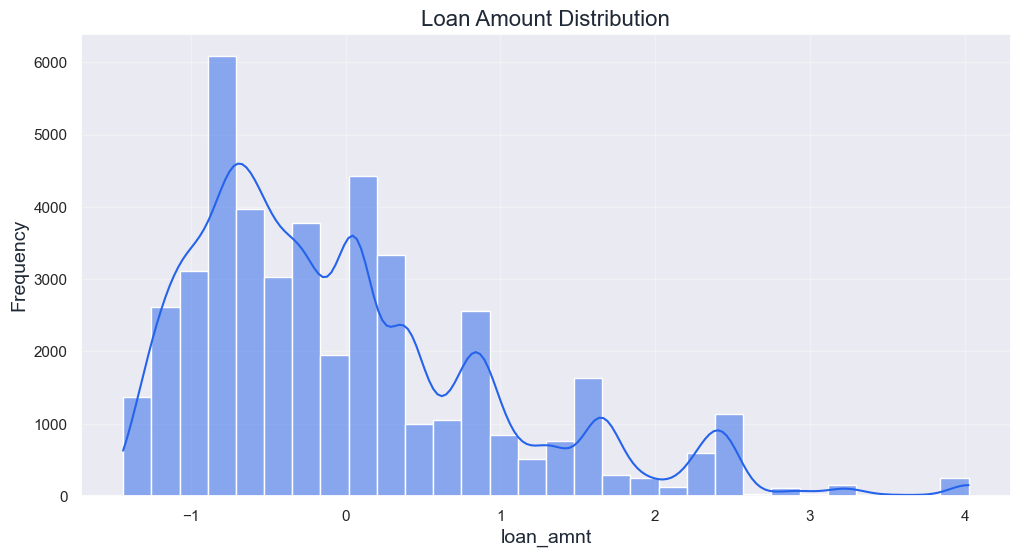

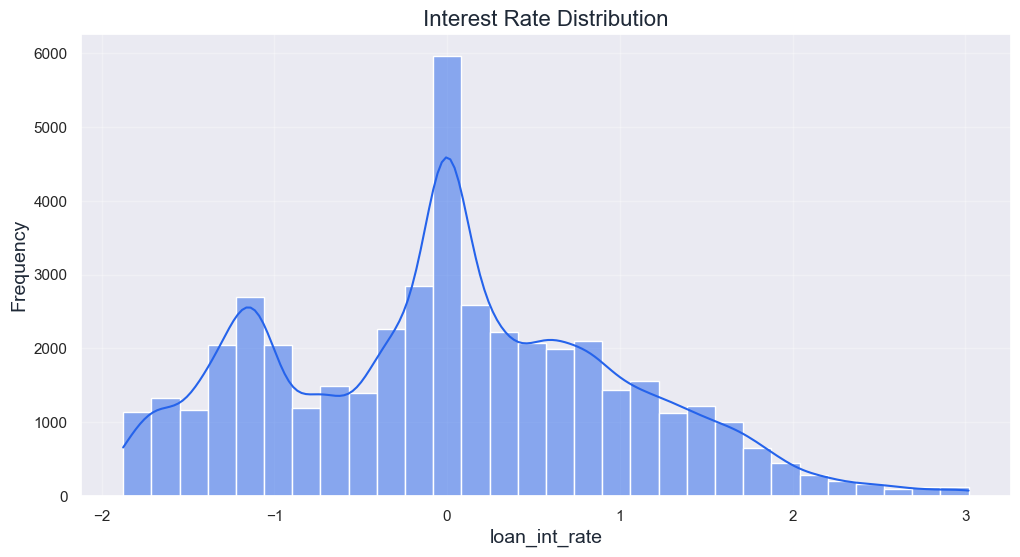

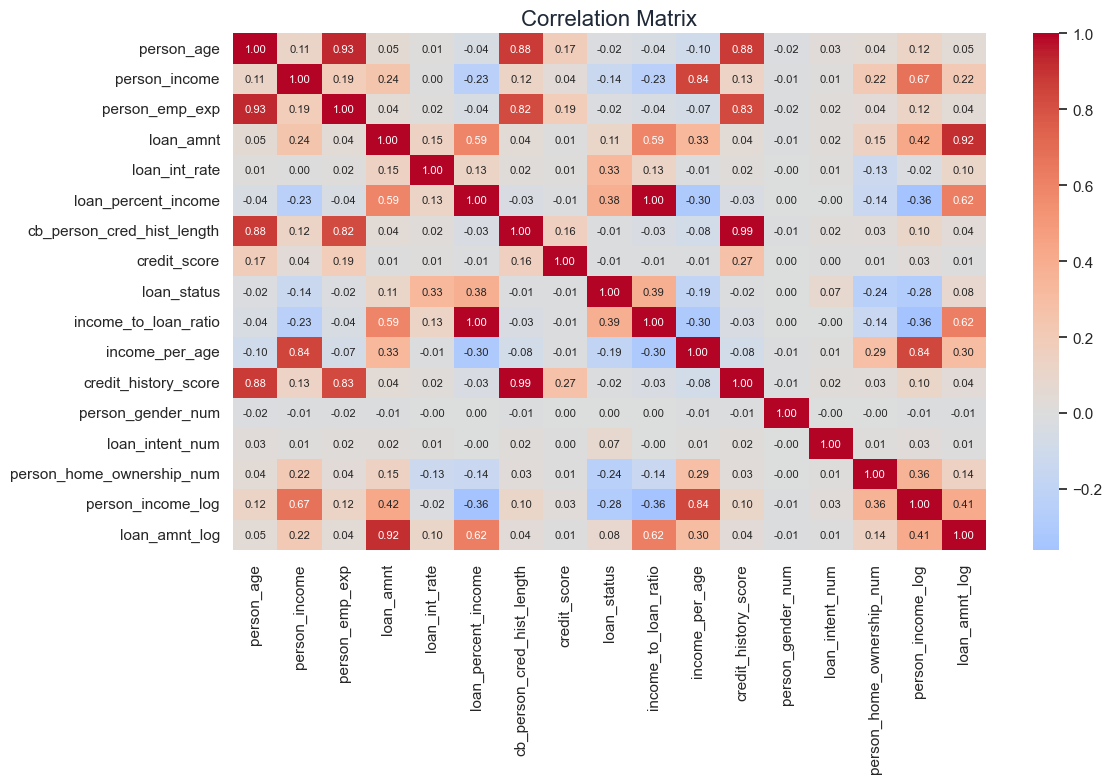

In [19]:
# Example visualizations
# Distribution of loan amounts
plot_distribution('loan_amnt', 'Loan Amount Distribution')

# Distribution of interest rates
plot_distribution('loan_int_rate', 'Interest Rate Distribution')  # Fixed column name

# Correlation matrix
plot_correlation()